learning a [Mackey-Glass](http://www.scholarpedia.org/article/Mackey-Glass_equation) system using Echo State Networks, and Evolutionary Algorithms in DEAP. 

Note: We are tuning up ESN's havin ga new HyperSphere activation function - and if the EA always selects it, then I think perhaps it is Better!

In [1]:
import random

from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import numpy as np
from pyESN import ESN

import datetime


In [2]:
# here's how to evaluate the ESN
# Load the data:
data = np.load('mackey_glass_t17.npy') 
# 
def evaluate(individual):
    '''
    build and test a model based on the parameters in an individual and return
    the AUROC value
    '''
    # extract the values of the parameters from the individual chromosome
    
    my_n_reservoir = individual[0]
    my_projection = individual[1]
    my_noise = individual[2]
    my_rectifier = individual[3]
    my_steepness = individual[4]
    my_sparsity = individual[5]
    my_sphere_radius = individual[6]
    my_teacher_forcing = individual[7]
    my_random_state = individual[8]
    my_spectral_radius = individual[9]
  
    data = np.load('mackey_glass_t17.npy')
    #  http://minds.jacobs-university.de/mantas/code
    esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = my_n_reservoir,
          spectral_radius = my_spectral_radius,
          noise = my_noise,
          sparsity = my_sparsity,
          projection = my_projection,
          steepness = my_steepness,
          sphere_radius = my_sphere_radius,
          rectifier = my_rectifier,
          random_state = my_random_state)    

    trainlen = 2000
    future = 2000
    pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

    prediction = esn.predict(np.ones(future))
    mse = np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))
    return mse, mse

In [22]:
# create a mutate function
def mutate(individual):
    
    gene = random.randint(0,9) # select which parameter to mutate
    
    if gene == 0:       # 0 attr_n_reservoir
        individual[0] = individual[0] + random.randint(-50, 50) # grow or shrink the resevoir on mutate
        
    elif gene == 1:     # 1 attr_projection
        individual[1] = random.choice(projection)
        #individual[0] = individual[0] + random.randint(-5, 50)

    elif gene == 2:     # 2 attr_noise
        individual[2] = random.choice(noise)
        #individual[0] = individual[0] + random.randint(-5, 50)
        
    elif gene == 3:     # 3 attr_rectifier
        individual[3] = random.choice(rectifier)
        #individual[0] = individual[0] + random.randint(-5, 50)
    
    elif gene ==4:      # 4 attr_steepness
        individual[4] = random.choice(steepness)
        individual[0] = individual[0] + random.randint(-50, 50)
    
    elif gene ==5:      # 5 attr_sparsity
        individual[5] = random.choice(sparsity)
        #individual[0] = individual[0] + random.randint(-5, 50)
    
    elif gene == 6:     # 6 attr_sphere_radius
        individual[6] = individual[6] + random.randint(-30, 30)*0.001   #random.choice(sphere_radius)
        #individual[0] = individual[0] + random.randint(-5, 50)
        
    elif gene ==7:      # 7 attr_teacher_forcing
        individual[7] = random.choice(teacher_forcing)
        individual[0] = individual[0] + random.randint(-50, 50)

    elif gene ==8:      # 8 attr_random_state
        individual[8] = random.choice(random_state)  
        #individual[0] = individual[0] + random.randint(-5, 50)

    elif gene == 9:     # 9 attr_spectral_radius
        #individual[9] = random.choice(spectral_radius)
        individual[9] = individual[9] + random.randint(-30, 30)*0.001
        
    return individual, 
    # note the final comma, leave it in the return 

In [23]:
# Start by setting up the DEAP genetic search fitness function
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # Minimize the fitness function value
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

/Users/useraccount/dev/environments/myspark/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/Users/useraccount/dev/environments/myspark/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [28]:
# Possible parameter values

# Size of the Reservoir
n_reservoir = [500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600] #, '210', '220', '230', '240', '250', '260', '270', '280', '290', '300', '310', '320', '330', '340', '350', '360', '370', '380', '390', '400', '410', '420', '430', '440', '450', '460', '470', '480', '490', '500', '510', '520', '530', '540', '550', '560', '570', '580', '590', '600', '610', '620', '630', '640', '650', '660', '670', '680', '690', '700', '710', '720', '730', '740', '750', '760', '770', '780', '790', '800', '810', '820', '830', '840', '850', '860', '870', '880', '890', '900', '910', '920', '930', '940', '950', '960', '970', '980', '990', '1000', '1010', '1020', '1030', '1040', '1050', '1060', '1070', '1080', '1090', '1100', '1110', '1120', '1130', '1140', '1150', '1160', '1170', '1180', '1190', '1200', '1210', '1220', '1230', '1240', '1250', '1260', '1270', '1280', '1290', '1300', '1310', '1320', '1330', '1340', '1350', '1360', '1370', '1380', '1390', '1400', '1410', '1420', '1430', '1440', '1450', '1460', '1470', '1480', '1490', '1500']

# projection:      0 = no projection, 1 = spherical projection (default), 2 = soft projection
projection = [1]

# noise:           0 = no noise (default), or set a noise value, ie 0.001, for (regularization)
noise = [0, 0, 0.00000000001]

# spectral radius
spectral_radius = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5] 

# rectifier:       0 = no rectifier (ie linear) default, 1 = hard tanh rectifier
rectifier = [0, 1]

# steepness: default is 2, or set a specfic steepness override to control soft projection
steepness = [2]

# sparsity
sparsity = [0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1] 

# sphere_radius
sphere_radius = [10,11,12,13,14,15,16,17, 18, 19, 20 ,21 ,22 ,23 ,24 ,25 ,26 ,27 ,28 ,29 ,30, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]


# teacher_forcing
teacher_forcing = [True]

# random state / seed
random_state = [18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 42]



In [29]:
#define how each gene will be generated (e.g. criterion is a random choice from the criterion list).
toolbox.register("attr_n_reservoir", random.choice, n_reservoir)
toolbox.register("attr_projection", random.choice, projection)
toolbox.register("attr_noise", random.choice, noise)
toolbox.register("attr_rectifier", random.choice, rectifier)
toolbox.register("attr_steepness", random.choice, steepness)
toolbox.register("attr_sparsity", random.choice, sparsity)
toolbox.register("attr_sphere_radius", random.choice, sphere_radius)
toolbox.register("attr_teacher_forcing", random.choice, teacher_forcing)
toolbox.register("attr_random_state", random.choice, random_state)
toolbox.register("attr_spectral_radius", random.choice, spectral_radius)

# This is the order in which genes will be combined to create a chromosome
N_CYCLES = 1
toolbox.register("individual", tools.initCycle, creator.Individual,
                 (  toolbox.attr_n_reservoir
                  , toolbox.attr_projection
                  , toolbox.attr_noise
                  , toolbox.attr_rectifier
                  , toolbox.attr_steepness
                  , toolbox.attr_sparsity
                  , toolbox.attr_sphere_radius
                  , toolbox.attr_teacher_forcing
                  , toolbox.attr_random_state
                  , toolbox.attr_spectral_radius
                  ), n=N_CYCLES)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [30]:
# test implementing a hack for elistism, found here: https://groups.google.com/forum/#!topic/deap-users/iannnLI2ncE

def selElitistAndTournament(individuals, k_elitist, k_tournament, tournsize):
    return tools.selBest(individuals, k_elitist) + tools.selTournament(individuals, k_tournament, tournsize=3)


In [31]:
## Run the genetic search using these params

population_size = 100
crossover_probability = 0.7
mutation_probability = 0.3
number_of_generations = 100
tournement_size = 3

In [32]:
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate",mutate)
toolbox.register("select", tools.selTournament, tournsize=tournement_size)

#POP_SIZE = population_size
#toolbox.register("select", selElitistAndTournament, k_elitist=int(0.1*POP_SIZE), k_tournament=POP_SIZE - int(0.1*POP_SIZE), tournsize=3)
toolbox.register("evaluate", evaluate)


In [33]:
pop = toolbox.population(n=population_size)
pop = tools.selBest(pop, int(0.1*len(pop))) + tools.selTournament(pop, len(pop)-int(0.1*len(pop)), tournsize=tournement_size)

hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
#stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

print(datetime.datetime.now())

2020-05-05 02:35:56.139530


In [34]:
# this runs The genetic search for the best ESN:

pop, log = algorithms.eaSimple(pop, toolbox, cxpb=crossover_probability, stats = stats,
                               mutpb = mutation_probability, ngen=number_of_generations, halloffame=hof, 
                               verbose=True) 

print(datetime.datetime.now())

gen	nevals	avg    	min      	max   
0  	30    	13336.5	0.0492652	127301
1  	20    	5333.67	0.0492652	158113
2  	24    	4.41952	0.0492652	126.508
3  	29    	3.24758	0.0469576	92.5642
4  	26    	75.6571	0.00677197	592.555
5  	21    	3.55771	0.0492652 	103.024
6  	25    	34.2962	0.0492652 	396.845
7  	24    	1.99453	0.038017  	57.1389
8  	22    	0.0868621	0.0214534 	0.1672 
9  	21    	6.88481  	0.00677197	193.983
10 	26    	55.5558  	0.00677197	1258.05
2020-05-05 02:42:18.081033


In [35]:
best_parameters = hof[0] # save the optimal set of parameters

gen = log.select("gen")
max_ = log.select("max")
avg = log.select("avg")
min_ = log.select("min")

In [36]:
print(best_parameters)

win_nr = best_parameters[0]
print("n_reservoir     = ", best_parameters[0])
print("projection      = ", best_parameters[1])
print("noise           = ", best_parameters[2])
print("rectifier       = ", best_parameters[3])
print("steepness       = ", best_parameters[4])
print("sparsity        = ", best_parameters[5])
print("sphere_radius   = ", best_parameters[6])
print("teacher_forcing = ", best_parameters[7])
print("random_state    = ", best_parameters[8])
print("spectral_radius = ", best_parameters[9])

[900, 1, 0, 1, 2, 0.6, 21.004, True, 27, 1.3]
n_reservoir     =  900
projection      =  1
noise           =  0
rectifier       =  1
steepness       =  2
sparsity        =  0.6
sphere_radius   =  21.004
teacher_forcing =  True
random_state    =  27
spectral_radius =  1.3


In [37]:
# plot the final output 

test error: 
0.006771968369603901


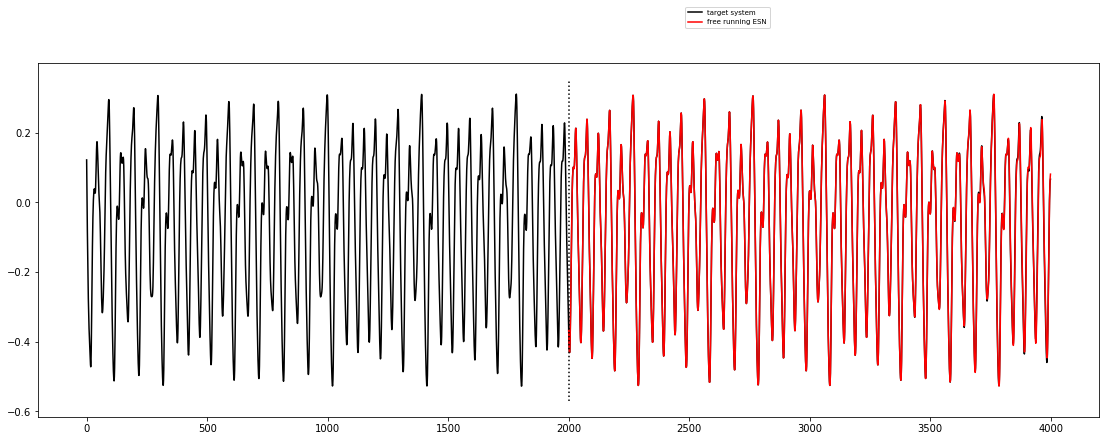

In [38]:
#import numpy as np
#from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

data = np.load('mackey_glass_t17.npy') #  http://minds.jacobs-university.de/mantas/code
esn = ESN(n_inputs = 1,        # not searched
          n_outputs = 1,       # not searched
          
          n_reservoir = best_parameters[0],       
          projection = best_parameters[1],
          noise = best_parameters[2], 
          rectifier = best_parameters[3],
          steepness = best_parameters[4],
          sparsity = best_parameters[5],            
          sphere_radius = best_parameters[6],
          teacher_forcing = best_parameters[7],
          random_state= best_parameters[8],
          spectral_radius = best_parameters[9],     
)

trainlen = 2000
future = 2000
pred_training = esn.fit(np.ones(trainlen),data[:trainlen])

prediction = esn.predict(np.ones(future))
print("test error: \n"+str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

plt.figure(figsize=(19,6.5))
plt.plot(range(0,trainlen+future),data[0:trainlen+future],'k',label="target system")
plt.plot(range(trainlen,trainlen+future),prediction,'r', label="free running ESN")
lo,hi = plt.ylim()
plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'k:')
plt.legend(loc=(0.61,1.1),fontsize='x-small')

In [39]:
print("CONCLUSION: The original pyESN.py demo has an error of 0.139603909616, versus this error of ")
print(str(np.sqrt(np.mean((prediction.flatten() - data[trainlen:trainlen+future])**2))))

CONCLUSION: The original pyESN.py demo has an error of 0.139603909616, versus this error of 
0.006771968369603901
